## Log axis, fatalities only

<Figure size 1000x500 with 0 Axes>

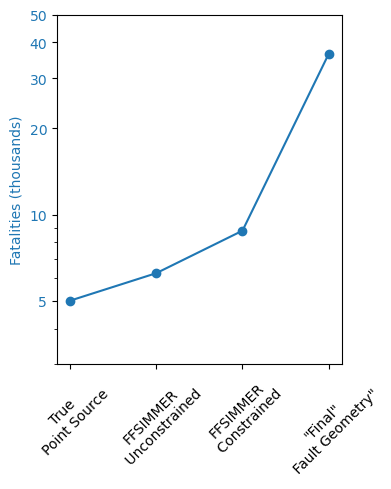

In [9]:
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Iterate through a list of files and read specific cells from an Excel file

files = [
    '/Users/hyin/shakemap_profiles/default/data/us7000pn9s_ffsimmer/v01_panel-b_true-point-source/products_v02/pager-output.xlsx',
    '/Users/hyin/shakemap_profiles/default/data/us7000pn9s_ffsimmer/v01_panel-c_ffsim-unconstrained/products_v02/pager-output.xlsx',
    '/Users/hyin/shakemap_profiles/default/data/us7000pn9s_ffsimmer/v01_panel-d_ffsim-constrained/products_v02/pager-output.xlsx',
    '/Users/hyin/shakemap_profiles/default/data/us7000pn9s_ffsimmer/v12_panel-e_final/products_v02/pager-output.xlsx'
]

losses = []
fatalities = []

for file in files:
    # Load the workbook
    workbook = openpyxl.load_workbook(file)
    
    # Select the active sheet (or specify a sheet name)
    sheet = workbook.active
    
    # Read specific cells (for example, cell V7 for fatalities and AG7 for economic losses)
    fatalities_value = sheet['V8'].value
    econ_losses_value = sheet['AG8'].value
    
    # Append the values to the lists
    fatalities.append(fatalities_value)
    losses.append(econ_losses_value)

losses_billions = [loss / 1e9 for loss in losses]
fatalities_thousands = [fatality / 1000 for fatality in fatalities]

plt.figure(figsize=(10, 5))
x = range(len(files))

fig, ax1 = plt.subplots(figsize=(4, 5))

# Plot the results
plt.plot(x,fatalities_thousands, label='Fatalities', marker='o')
# Set up log scale axis and ticks
ax1.set_yscale('log')
ax1.set_yticks([1,5, 10, 20, 30, 40, 50])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_ylim(3, 50)

ax1.set_ylabel('Fatalities (thousands)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(x)

# plt.title('Fatalities and Economic Losses')
array_labels = ['True \nPoint Source', 'FFSIMMER\n Unconstrained', 'FFSIMMER\n Constrained', '"Final"\n Fault Geometry"']
ax1.set_xticklabels(array_labels)
ax1.tick_params("x", rotation=45)

fig.tight_layout()

plt.savefig('/Users/hyin/usgs_mendenhall/nodal-plane-selection/worden_manuscript/pager-evolution-v02.png', dpi=300, bbox_inches='tight')



<Figure size 1000x500 with 0 Axes>

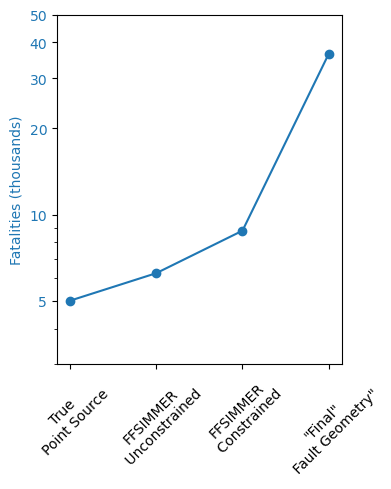

## Linear axis, fatalities and economic losses

<Figure size 1000x500 with 0 Axes>

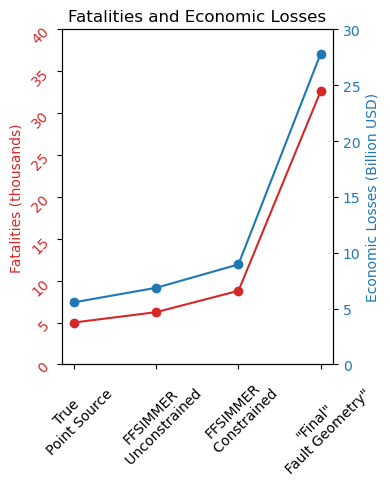

In [2]:
import openpyxl

# Iterate through a list of files and read specific cells from an Excel file

files = [
    '/Users/hyin/shakemap_profiles/default/data/us7000pn9s_ffsimmer/v01_panel-b_true-point-source/products_v01/pager-output.xlsx',
    '/Users/hyin/shakemap_profiles/default/data/us7000pn9s_ffsimmer/v01_panel-c_ffsim-unconstrained/products_v01/pager-output.xlsx',
    '/Users/hyin/shakemap_profiles/default/data/us7000pn9s_ffsimmer/v01_panel-d_ffsim-constrained/products_v01/pager-output.xlsx',
    '/Users/hyin/shakemap_profiles/default/data/us7000pn9s_ffsimmer/v12_panel-e_final/products_v01/pager-output.xlsx'
]

losses = []
fatalities = []

for file in files:
    # Load the workbook
    workbook = openpyxl.load_workbook(file)
    
    # Select the active sheet (or specify a sheet name)
    sheet = workbook.active
    
    # Read specific cells (for example, cell V7 for fatalities and AG7 for economic losses)
    fatalities_value = sheet['V7'].value
    econ_losses_value = sheet['AG7'].value
    
    # Append the values to the lists
    fatalities.append(fatalities_value)
    losses.append(econ_losses_value)

losses_billions = [loss / 1e9 for loss in losses]
fatalities_thousands = [fatality / 1000 for fatality in fatalities]

# Plot the results
import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 5))
# plt.plot(fatalities, label='Fatalities', marker='o')
# plt.plot(losses, label='Economic Losses (USD)', marker='o')
# plt.title('Fatalities and Economic Losses Over Different Panels')
# plt.xlabel('Panel')
# plt.ylabel('Count / USD')

# plt.show()

plt.figure(figsize=(10, 5))
x = range(len(files))

fig, ax1 = plt.subplots(figsize=(4, 5))

color1 = 'tab:red'
ax1.set_ylabel('Fatalities (thousands)', color=color1)
ax1.plot(x, fatalities_thousands, color=color1, marker='o', label='Fatalities')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.tick_params("y", rotation=45)
ax1.set_ylim(0,40)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
# ax2.set_ylabel('Economic Losses (USD)', color=color2)
# ax2.plot(x, losses, color=color2, marker='o', label='Economic Losses (USD)')
ax2.set_ylabel('Economic Losses (Billion USD)', color=color2)
ax2.plot(x, losses_billions, color=color2, marker='o', label='Economic Losses (Billion USD)')
# ax2.semilogy(x, losses, color=color2, marker='o', label='Economic Losses (Billion USD)')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0,30)

plt.title('Fatalities and Economic Losses')
array_labels = ['True \nPoint Source', 'FFSIMMER\n Unconstrained', 'FFSIMMER\n Constrained', '"Final"\n Fault Geometry"']
ax1.set_xticks(x)
ax1.set_xticklabels(array_labels)
ax1.tick_params("x", rotation=45)

fig.tight_layout()
# plt.show()
plt.savefig('/Users/hyin/usgs_mendenhall/nodal-plane-selection/worden_manuscript/pager-evolution.png', dpi=300, bbox_inches='tight')
